# Import Necessary libraries

In [1]:
#import the necessary libraries to perform the operation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Read the data set

In [25]:
#Read the dataset from csv file
df = pd.read_csv('Around_World.csv', sep = ',')

In [31]:
#Show the first five rows of the dataset
df.head()

3,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
4,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662,66.074,66.444,66.787,67.113,67.435,...,75.017,75.158,75.299,75.441,75.583,75.725,75.868,76.010,76.152,NaN
5,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.446,32.962,33.471,33.971,34.463,34.948,...,61.028,61.553,62.054,62.525,62.966,63.377,63.763,64.130,64.486,NaN
6,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.524,37.811,38.113,38.430,38.760,39.102,...,55.350,56.330,57.236,58.054,58.776,59.398,59.925,60.379,60.782,NaN
7,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,62.283,63.301,64.190,64.914,65.463,65.850,...,76.562,76.914,77.252,77.554,77.813,78.025,78.194,78.333,78.458,NaN
8,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
#This code is copied from stack overflow to remove all rows before Country Name which are not useful
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header



# Missing Data
We will use some techniques to find missing data and clean them

In [32]:
#Calculate how much the sum of all the missing values in each columns of the data set

df.isnull().sum()

3
Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960.0             29
                 ... 
2015.0             17
2016.0             17
2017.0             19
2018.0             20
2019.0            264
Length: 64, dtype: int64

In [33]:
#As we can see in 2019, the whole columns is filled with NaN values, so we can drop it
df.drop(2019, axis = 1, inplace = True)

In [34]:
df.head()

3,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0
4,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662,66.074,66.444,66.787,67.113,67.435,...,74.872,75.017,75.158,75.299,75.441,75.583,75.725,75.868,76.010,76.152
5,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.446,32.962,33.471,33.971,34.463,34.948,...,60.484,61.028,61.553,62.054,62.525,62.966,63.377,63.763,64.130,64.486
6,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.524,37.811,38.113,38.430,38.760,39.102,...,54.311,55.350,56.330,57.236,58.054,58.776,59.398,59.925,60.379,60.782
7,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,62.283,63.301,64.190,64.914,65.463,65.850,...,76.221,76.562,76.914,77.252,77.554,77.813,78.025,78.194,78.333,78.458
8,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


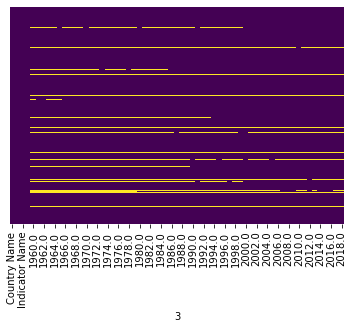

In [35]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [36]:
#drop the rows if any of them contains the missing values
df.dropna(axis = 0, how = 'any', inplace = True)

In [37]:
#Now we find that no row contains the missing value
df.isnull().sum()

3
Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960.0            0
                 ..
2014.0            0
2015.0            0
2016.0            0
2017.0            0
2018.0            0
Length: 63, dtype: int64

In [38]:
df.head()

3,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0
4,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662000,66.074000,66.444000,66.787000,67.113000,67.435000,...,74.87200,75.017000,75.158000,75.299000,75.441000,75.583000,75.725000,75.868000,76.010000,76.152000
5,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.446000,32.962000,33.471000,33.971000,34.463000,34.948000,...,60.48400,61.028000,61.553000,62.054000,62.525000,62.966000,63.377000,63.763000,64.130000,64.486000
6,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.524000,37.811000,38.113000,38.430000,38.760000,39.102000,...,54.31100,55.350000,56.330000,57.236000,58.054000,58.776000,59.398000,59.925000,60.379000,60.782000
7,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,62.283000,63.301000,64.190000,64.914000,65.463000,65.850000,...,76.22100,76.562000,76.914000,77.252000,77.554000,77.813000,78.025000,78.194000,78.333000,78.458000
9,Arab World,ARB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,46.546909,47.141621,47.731783,48.320432,48.910019,49.496478,...,70.15756,70.349916,70.528775,70.703827,70.882254,71.064292,71.249571,71.436497,71.622526,71.806825


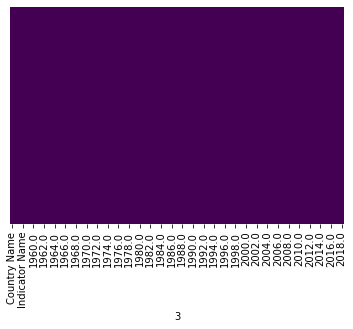

In [39]:
#Again check with heatmap
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [52]:
#let's create a scatter plot to check between Country Name and the Year 2018
x = df['Country Name']
y = df[2018.0]

(0, 86.54734881275176)

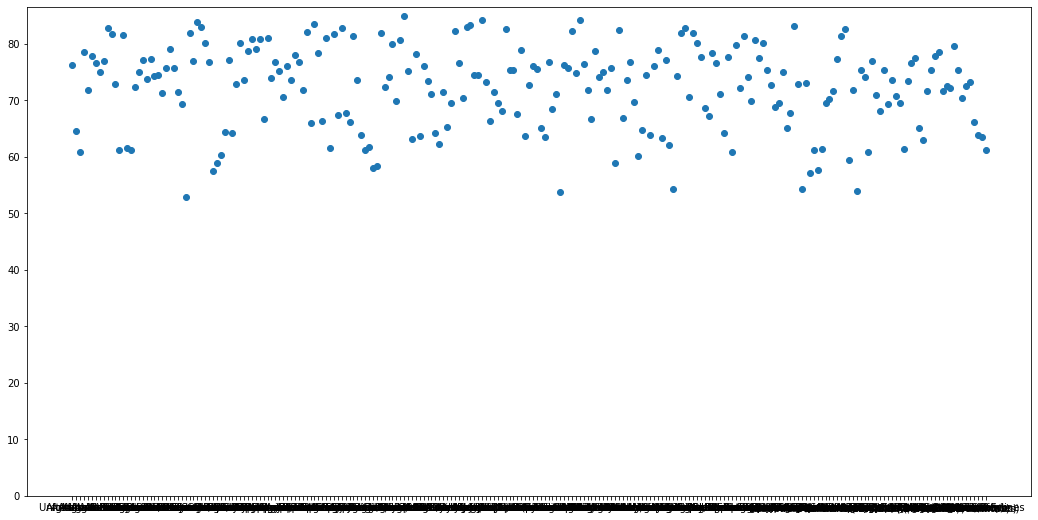

In [57]:
plt.figure(figsize = (18,9))
plt.scatter(x,y)
plt.ylim(0, )

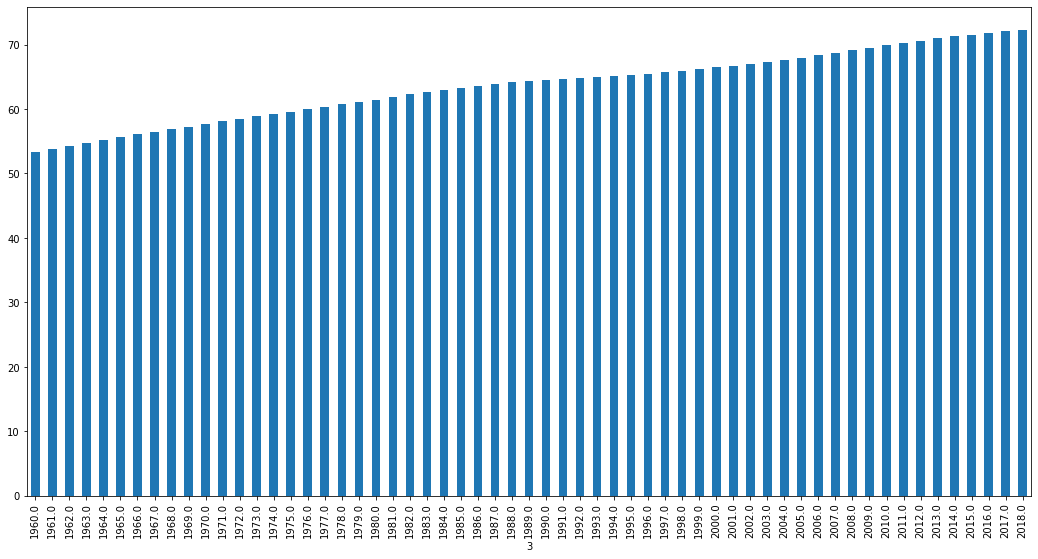

In [64]:
#Lets plot our data set in the form of bars
plt.figure(figsize = (18,9))
dataframe = df.mean()
dataframe.plot(kind = 'bar')